# Nivel de Ingresos por Entidad Federativa

El dataset analizado en este notebook fue extraído de la [página web del Gobierno de Mexico](https://datos.gob.mx/busca/dataset/indicadores-estrategicos-poblacion-ocupada-por-nivel-de-ingresos). Dicho análisis tiene como objetivo tener una visión generalizada y estimativa de los ingresos de las personas en cada Entidad Federativa (provincia), teniendo en cuenta la distribución de precios por provincia calculada previamente.

In [585]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [586]:
df = pd.read_csv('./data/Poblacion_Ocupada_Nivel_Ingresos.csv', encoding='utf-8',dtype={'Entidad_Federativa':'category', 'Nivel_Ingresos':'category'})

#Fuente: https://datos.gob.mx/busca/dataset/indicadores-estrategicos-poblacion-ocupada-por-nivel-de-ingresos

In [587]:
df['Numero_personas'] = df['Numero_personas'].fillna(-1)
df['Numero_personas'] = df['Numero_personas'].astype(np.int64)
df.dtypes

Periodo                  int64
Entidad_Federativa    category
Sexo                    object
Grupo_edad              object
Nivel_Ingresos        category
Numero_personas          int64
dtype: object

El dataset corresponde desde 2005 hasta 2019:

In [588]:
(df['Periodo'].max(),df['Periodo'].min())

(20190601, 20050301)

# Depuración del dataset
Como podemos observar a continuación, el dataset presenta numerosas inconsistencias tipográficas, las cuales se arreglarán para una mejor interpretación del mismo.

In [589]:
df['Nivel_Ingresos'].value_counts()

M s de 1 hasta 2 s.m.     15982
M s de 2 hasta 3 s.m.     15910
No especificado           15772
Menos de 1 s.m.           15724
M s de 3 hasta 5 s.m.     15635
No recibe ingresos        15540
M s de 5 hasta 10 s.m.    14918
M s de 10 s.m.            12596
1 salario m¡nimo          11778
Name: Nivel_Ingresos, dtype: int64

In [590]:
dfa = df.loc[(~df['Entidad_Federativa'].isnull()) & (~df['Nivel_Ingresos'].isnull()) & (~df['Numero_personas'].isnull()) & (df['Numero_personas'] > 0)].copy()
datos = dfa.loc[:,['Entidad_Federativa', 'Nivel_Ingresos','Numero_personas']].copy()
datos.head(10)

,Entidad_Federativa,Nivel_Ingresos,Numero_personas
0,Aguascalientes,Menos de 1 s.m.,3591
1,Aguascalientes,1 salario m¡nimo,453
2,Aguascalientes,M s de 1 hasta 2 s.m.,17949
3,Aguascalientes,M s de 2 hasta 3 s.m.,16485
4,Aguascalientes,M s de 3 hasta 5 s.m.,7631
5,Aguascalientes,M s de 5 hasta 10 s.m.,793
6,Aguascalientes,M s de 10 s.m.,162
7,Aguascalientes,No recibe ingresos,3955
8,Aguascalientes,No especificado,5762
9,Aguascalientes,Menos de 1 s.m.,2774


In [591]:
datos= datos.copy()
categorias = {'M\xa0s de 1 hasta 2 s.m.': 'Mas de 1 hasta 2 salarios minimos',
            'M\xa0s de 2 hasta 3 s.m.': 'Mas de 2 hasta 3 salarios minimos',
            'Menos de 1 s.m.': 'Menos de 1 salario minimo',
            'M\xa0s de 3 hasta 5 s.m.': 'Mas de 3 hasta 5 salarios minimos',
            'M\xa0s de 5 hasta 10 s.m.': 'Mas de 5 hasta 10 salarios minimos',
            'M\xa0s de 10 s.m.': 'Mas de 10 salarios minimos',
            '1 salario m¡nimo': '1 salario minimo'}

datos['Nivel_Ingresos'] = datos['Nivel_Ingresos'].replace(categorias)


estados = {'Estado de M‚xico': 'Estado de Mexico',
           'Ciudad de M‚xico':'Ciudad de Mexico',
           'Nuevo Le¢n':'Nuevo Leon'}

datos['Entidad_Federativa'] = datos['Entidad_Federativa'].replace(estados)

datos.head(15)

,Entidad_Federativa,Nivel_Ingresos,Numero_personas
0,Aguascalientes,Menos de 1 salario minimo,3591
1,Aguascalientes,1 salario minimo,453
2,Aguascalientes,Mas de 1 hasta 2 salarios minimos,17949
3,Aguascalientes,Mas de 2 hasta 3 salarios minimos,16485
4,Aguascalientes,Mas de 3 hasta 5 salarios minimos,7631
5,Aguascalientes,Mas de 5 hasta 10 salarios minimos,793
6,Aguascalientes,Mas de 10 salarios minimos,162
7,Aguascalientes,No recibe ingresos,3955
8,Aguascalientes,No especificado,5762
9,Aguascalientes,Menos de 1 salario minimo,2774


In [592]:
#Agrupo por Entidad Federativa, por Nivel de Ingresos y aplico la suma para calcular la cantidad de personas
datos_new = datos.groupby(['Entidad_Federativa','Nivel_Ingresos'])['Numero_personas'].agg(['sum']).fillna(0).reset_index()
datos_new.head(15)

,Entidad_Federativa,Nivel_Ingresos,sum
0,Aguascalientes,1 salario minimo,102143
1,Aguascalientes,Mas de 1 hasta 2 salarios minimos,6070112
2,Aguascalientes,Mas de 10 salarios minimos,388768
3,Aguascalientes,Mas de 2 hasta 3 salarios minimos,5902139
4,Aguascalientes,Mas de 3 hasta 5 salarios minimos,4009429
5,Aguascalientes,Mas de 5 hasta 10 salarios minimos,1553440
6,Aguascalientes,Menos de 1 salario minimo,1880022
7,Aguascalientes,No especificado,7056111
8,Aguascalientes,No recibe ingresos,985770
9,Baja California,1 salario minimo,315495


In [593]:
leyenda = ['No recibe ingresos',
           'Menos de 1 salario minimo',
           '1 salario minimo',
           'Mas de 1 hasta 2 salarios minimos',
           'Mas de 2 hasta 3 salarios minimos',
           'Mas de 3 hasta 5 salarios minimos',
           'Mas de 5 hasta 10 salarios minimos',
           'Mas de 10 salarios minimos']

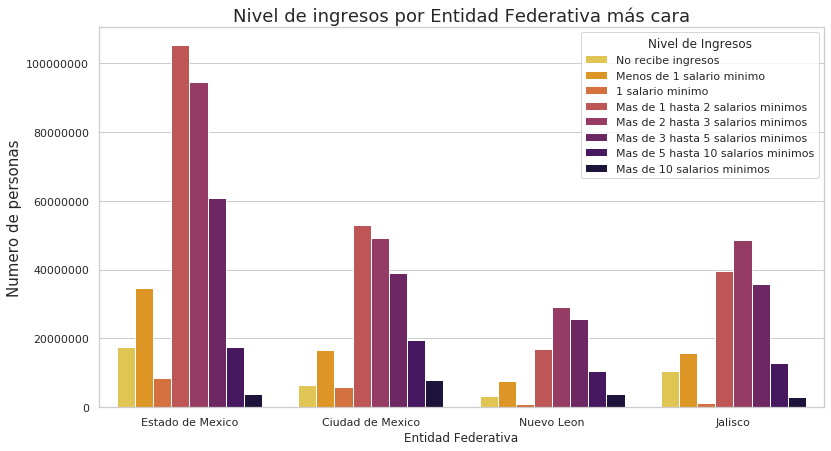

In [594]:
ciudades_caras = ['Estado de Mexico','Ciudad de Mexico','Nuevo Leon', 'Jalisco']

sns.set(style="whitegrid")
plt.figure(figsize=(13, 7))
plt.ticklabel_format(style='plain')
sns.barplot(palette = 'inferno_r', order = ciudades_caras, data = datos_new, hue_order = leyenda, hue = "Nivel_Ingresos", x="Entidad_Federativa", y="sum")
plt.legend(title='Nivel de Ingresos')
plt.title("Nivel de ingresos por Entidad Federativa más cara", loc='center',fontsize=18)
plt.xlabel('Entidad Federativa',fontsize=12)
plt.ylabel('Numero de personas',fontsize=15)
plt.savefig("NivelIngresosEntidadCara.png",bbox_inches='tight')

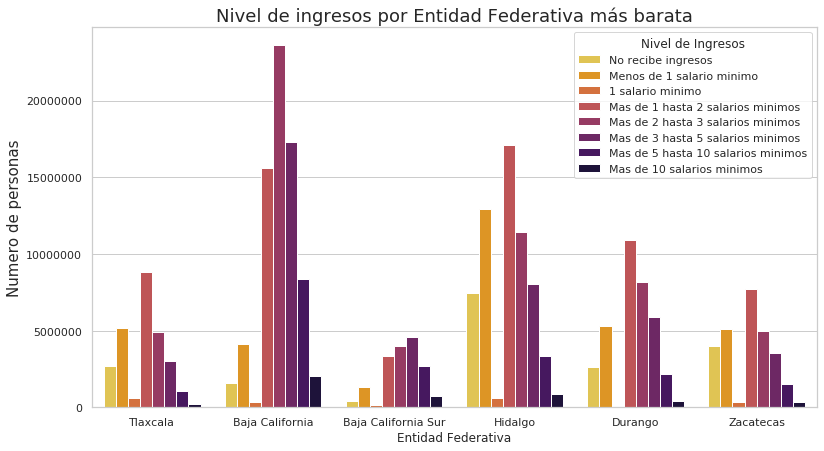

In [595]:
ciudades_baratas = ['Tlaxcala','Baja California','Baja California Sur','Hidalgo','Durango','Zacatecas']

sns.set(style="whitegrid")
plt.figure(figsize=(13, 7))
plt.ticklabel_format(style='plain')
sns.barplot(palette = 'inferno_r', order = ciudades_baratas, data = datos_new,hue_order = leyenda, hue = "Nivel_Ingresos", x="Entidad_Federativa", y="sum")
plt.legend(title='Nivel de Ingresos')
plt.title("Nivel de ingresos por Entidad Federativa más barata", loc='center',fontsize=18)
plt.xlabel('Entidad Federativa',fontsize=12)
plt.ylabel('Numero de personas',fontsize=15)
plt.savefig("NivelIngresosEntidadBarata.png",bbox_inches='tight')